### Requirements

- httpx
- folium
- owslib

`!python -m pip install httpx folium owslib`

In [1]:
import httpx

endpoint = "http://127.0.0.1:8080"

resp = httpx.get(endpoint)
print(resp)

<Response [200 OK]>


In [2]:
resp = httpx.get(f"{endpoint}/info")
print(resp.json())

{'url': 'https://stac.eoapi.dev'}


In [4]:
resp = httpx.get(
    f"{endpoint}/wmts",
    params={
        "service": "wmts",  # Mandatory
        "request": "GetCapabilities",  # Mandatory
        "version": "1.0.0",  # Optional
    },
)
print(resp)
print(resp.headers)

<Response [200 OK]>
Headers({'date': 'Wed, 17 Apr 2024 07:08:45 GMT', 'server': 'uvicorn', 'content-length': '1350544', 'content-type': 'application/xml', 'cache-control': 'public, max-age=3600'})


In [5]:
print(resp.url)

http://127.0.0.1:8080/wmts?service=wmts&request=GetCapabilities&version=1.0.0


In [8]:

from owslib.wmts import WebMapTileService

wmts = WebMapTileService(
    "http://127.0.0.1:8080/wmts?service=wmts&request=GetCapabilities&version=1.0.0",
)
print(wmts.identification)
print()
for layer in list(wmts.contents):
    print(layer)

print()
layer = wmts["MAXAR_Emilia_Romagna_Italy_flooding_may23_visual"]
print(layer)
print(layer.boundingBoxWGS84)
print()
print("Supported TMS:")
print(layer.tilematrixsetlinks)
print()
print("TMS Limits:")
print(layer.tilematrixsetlinks["EPSG:3857"].tilematrixlimits)
print()
print("Layer dimensions")
print(layer.dimensions)


Service: OGC WMTS, title=Web Map Tile Service

MAXAR_BayofBengal_Cyclone_Mocha_May_23_visual
MAXAR_ghana_explosion22_visual
MAXAR_kentucky_flooding_7_29_2022_visual
MAXAR_Emilia_Romagna_Italy_flooding_may23_visual
MAXAR_Gambia_flooding_8_11_2022_visual
MAXAR_Hurricane_Fiona_9_19_2022_visual
MAXAR_Hurricane_Ian_9_26_2022_visual
MAXAR_Hurricane_Idalia_Florida_Aug23_visual
MAXAR_India_Floods_Oct_2023_visual
MAXAR_Indonesia_Earthquake22_visual
MAXAR_Kahramanmaras_turkey_earthquake_23_visual
MAXAR_Kalehe_DRC_Flooding_5_8_23_visual
MAXAR_Libya_Floods_Sept_2023_visual
MAXAR_Marshall_Fire_21_Update_visual
MAXAR_Maui_Hawaii_fires_Aug_23_visual
MAXAR_McDougallCreekWildfire_BC_Canada_Aug_23_visual
MAXAR_Morocco_Earthquake_Sept_2023_visual
MAXAR_NWT_Canada_Aug_23_visual
MAXAR_Nepal_Earthquake_Nov_2023_visual
MAXAR_New_Zealand_Flooding23_visual
MAXAR_Sudan_flooding_8_22_2022_visual
MAXAR_afghanistan_earthquake22_visual
MAXAR_cyclone_emnati22_visual
MAXAR_pakistan_flooding22_visual
MAXAR_shovi_georg

In [16]:
tile = wmts.gettile(
    layer='MAXAR_Emilia_Romagna_Italy_flooding_may23_visual',
    style="default",
    tilematrixset='EPSG:3857',
    tilematrix='13',
    column=4373,
    row=2963,
    format="image/png",
    time="2023-05-23",
)

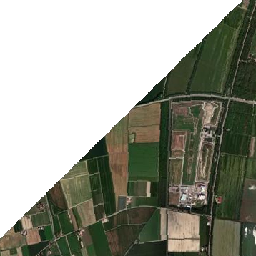

In [17]:
from IPython.display import Image

Image(tile.read())

In [3]:
from folium import Map, TileLayer

m = Map(
    location=(44.52, 12.22),
    zoom_start=12
)

collection = "MAXAR_Emilia_Romagna_Italy_flooding_may23"
TIME = "2023-05-23"
TileMatrixSet = "EPSG:3857"

tiles_url = f"http://127.0.0.1:8080/{collection}/default/{TIME}/{TileMatrixSet}/{{z}}/{{x}}/{{y}}.png?assets=visual&asset_bidx=visual%7C1%2C2%2C3"

TileLayer(
    tiles=tiles_url,
    opacity=1,
    attr="DigitalGlobe OpenData"
).add_to(m)

m